# Análisis Exploratorio de Datos (EDA): Coste de seguro médico

## Planteamiento del problema y recopilación de datos

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest



# Leer el archivo CSV
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv', sep=',') # Este archivo CSV contiene comas como separadores
print(df.head())
print(df.columns) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')


## Exploración y limpieza de datos

Comprobamos las dimensiones del dataframe y, además de si los datos concuerdan con el número total, vemos el tipo de dato y podemos separar entre variables categóricas y numéricas

In [20]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (1338, 7)
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None


Procedemos a contabilizar los nulos y únicos: 

In [21]:
print(f"Valores null por columna: \n{df.isnull().sum()}\n")
print(f"Valores unicos por columna: \n{df.nunique()}")

Valores null por columna: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Valores unicos por columna: 
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


#### Resumen de cada columna:

age. Edad del beneficiario principal (numérico)  
sex. Género del beneficiario principal (categórico)  
bmi. índice de masa corporal (numérico)  
children. Número de niños/dependientes cubiertos por un seguro médico (numérico)  
smoker. ¿Es fumador? (categórico)  
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)  
charges. Prima del seguro médico (numérico)  

### Eliminamos las columnas que no nos aportan datos relevantes

En este análisis no hay ninguna columna que se pueda eliminar ya que afectaría negativamente al modelo.

In [22]:
total_dataf = df

## Análisis de variables univariante

### Generamos gráficos con los valores categóricos

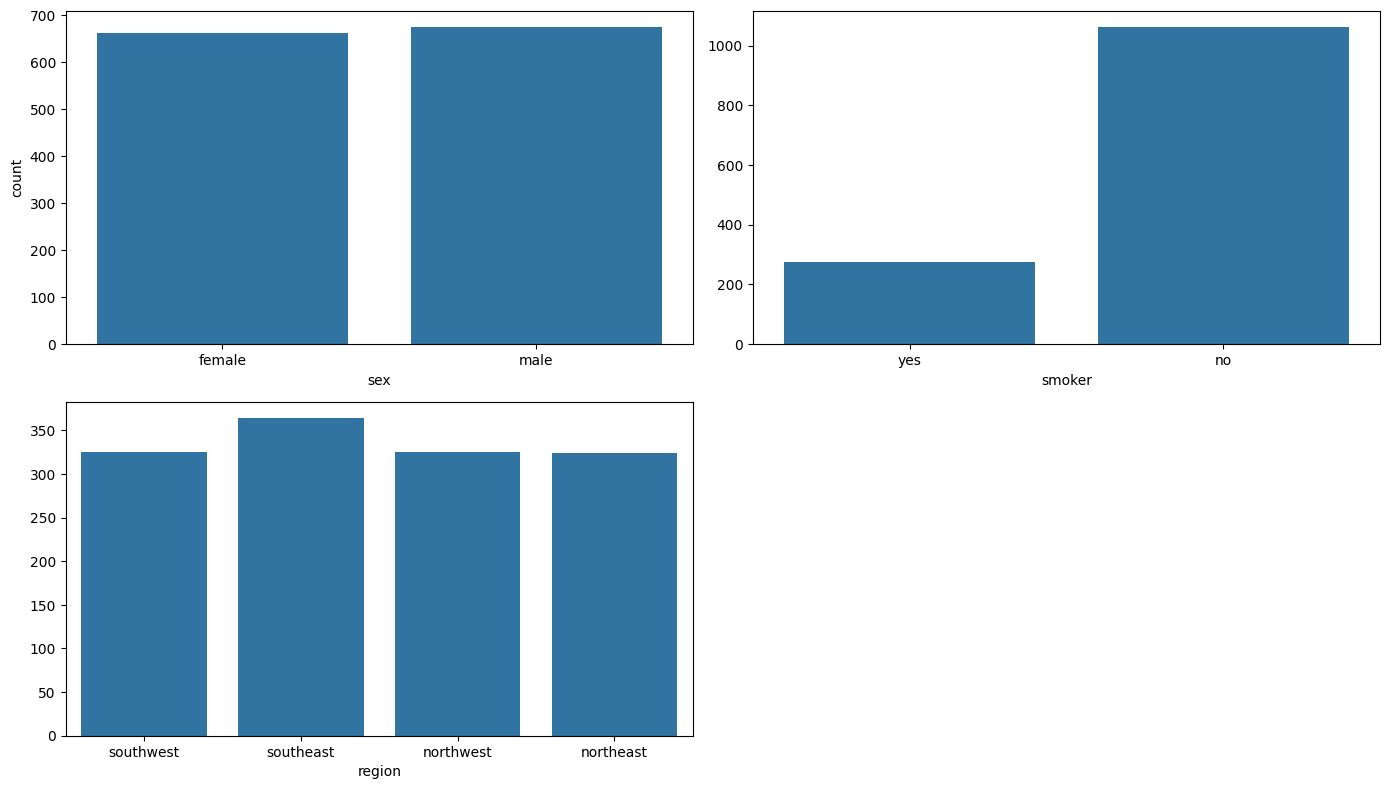

In [23]:
fig, axis = plt.subplots(2, 2, figsize = (14, 8))

# Crear un histograma múltiple

sns.countplot(ax = axis[0, 0], data = total_dataf, x = "sex")
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "smoker").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_dataf, x = "region").set(ylabel = None)

fig.delaxes(axis[1, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()


# Mostrar el plot
plt.show()

### Generamos gráficos con los valores numéricos

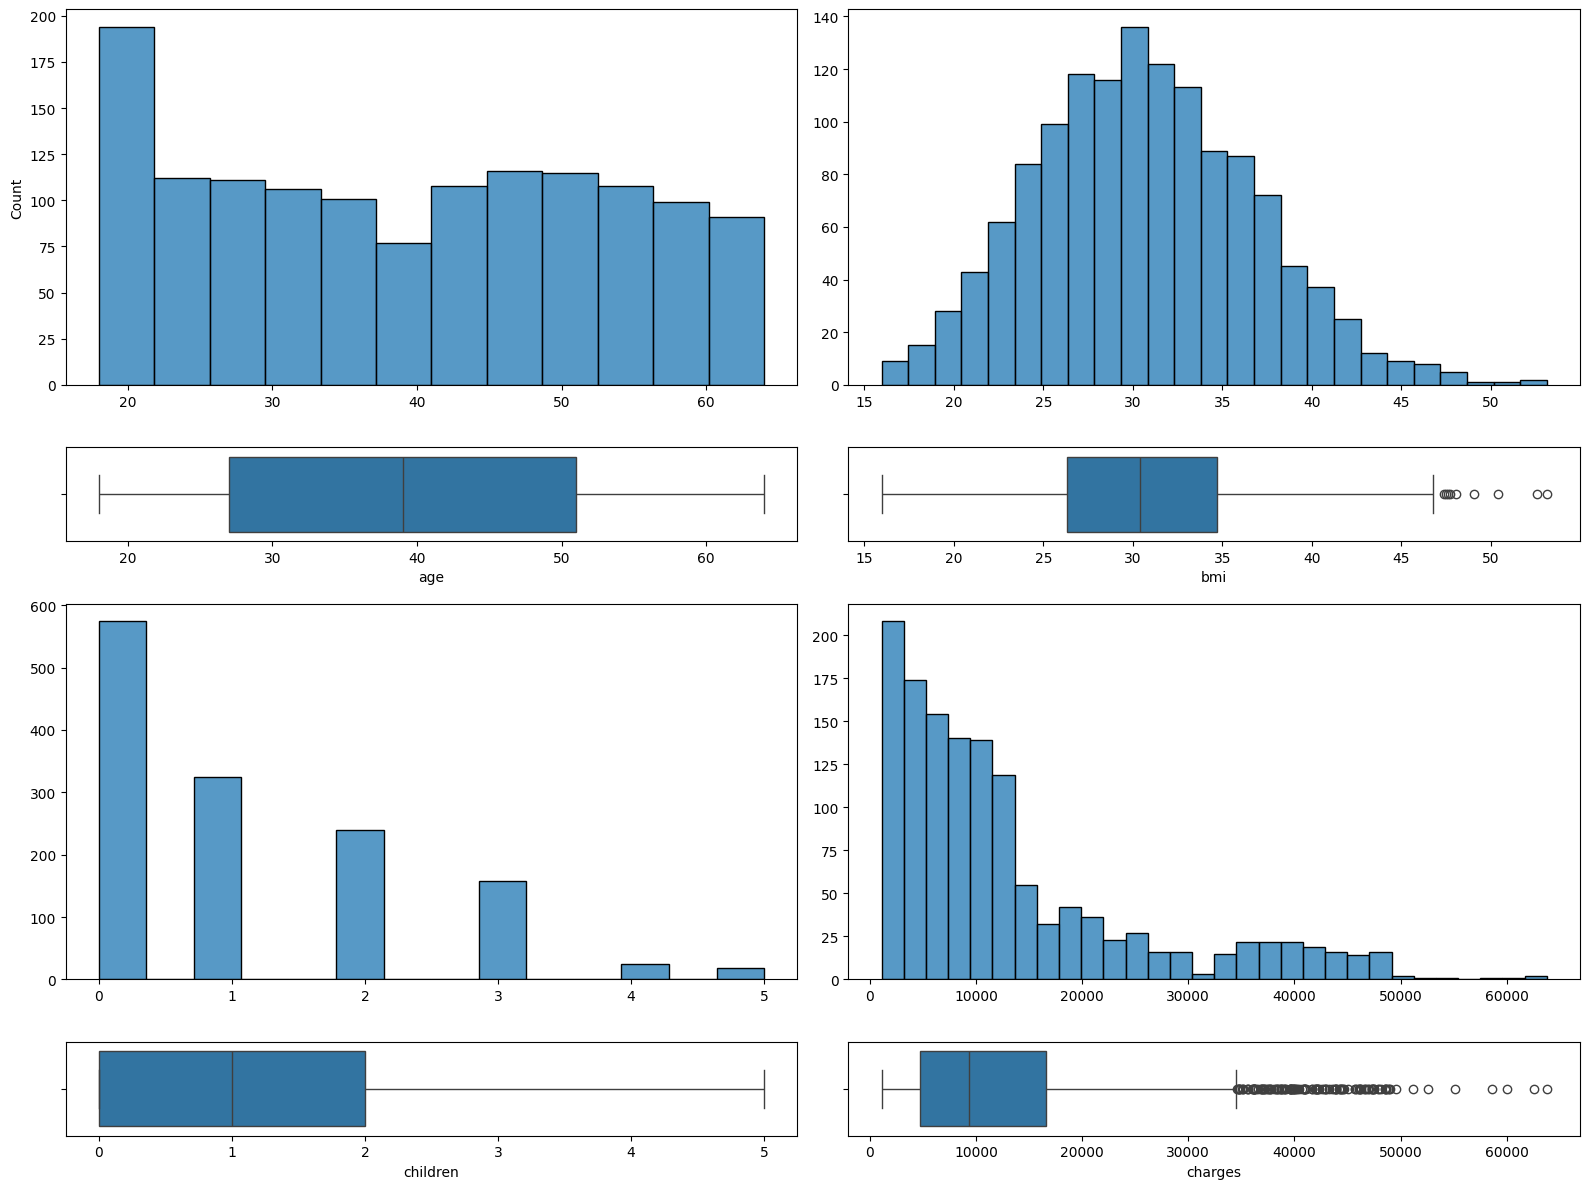

In [24]:
fig, axis = plt.subplots(4, 2, figsize = (16, 12), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja age bmi children charges
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "age")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_dataf, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "children")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "charges")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos el dato "charges" como variable objetivo

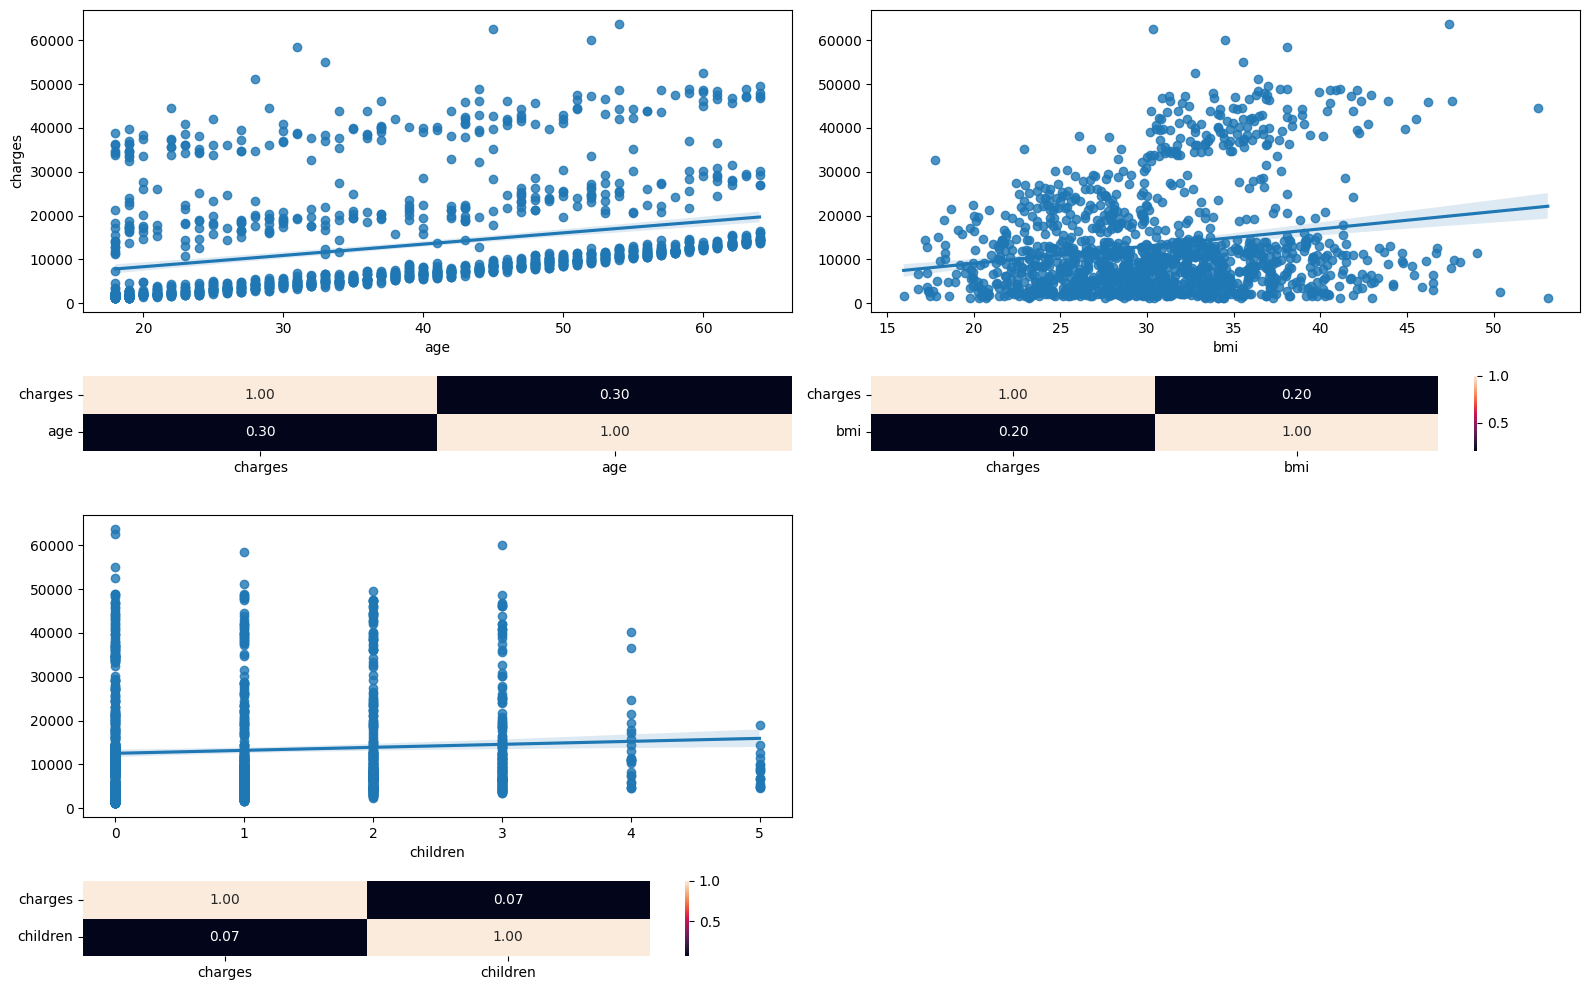

In [25]:
fig, axis = plt.subplots(4, 2, figsize = (16, 10), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "age", y = "charges")
sns.heatmap(total_dataf[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_dataf[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_dataf, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_dataf[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])


fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede apreciar que la variable "age" tiene una influencia y aumenta el valor de la variable objetivo, seguidamente la variable "bmi" influye también, aunque no tanto, en nuestra variable objetivo y por último
"children" influye muy ligeramente a la hora de calcular el precio de "charges".

### Combinaciones entre variables numéricas

Vamos a explorar la relación entre: age-bmi

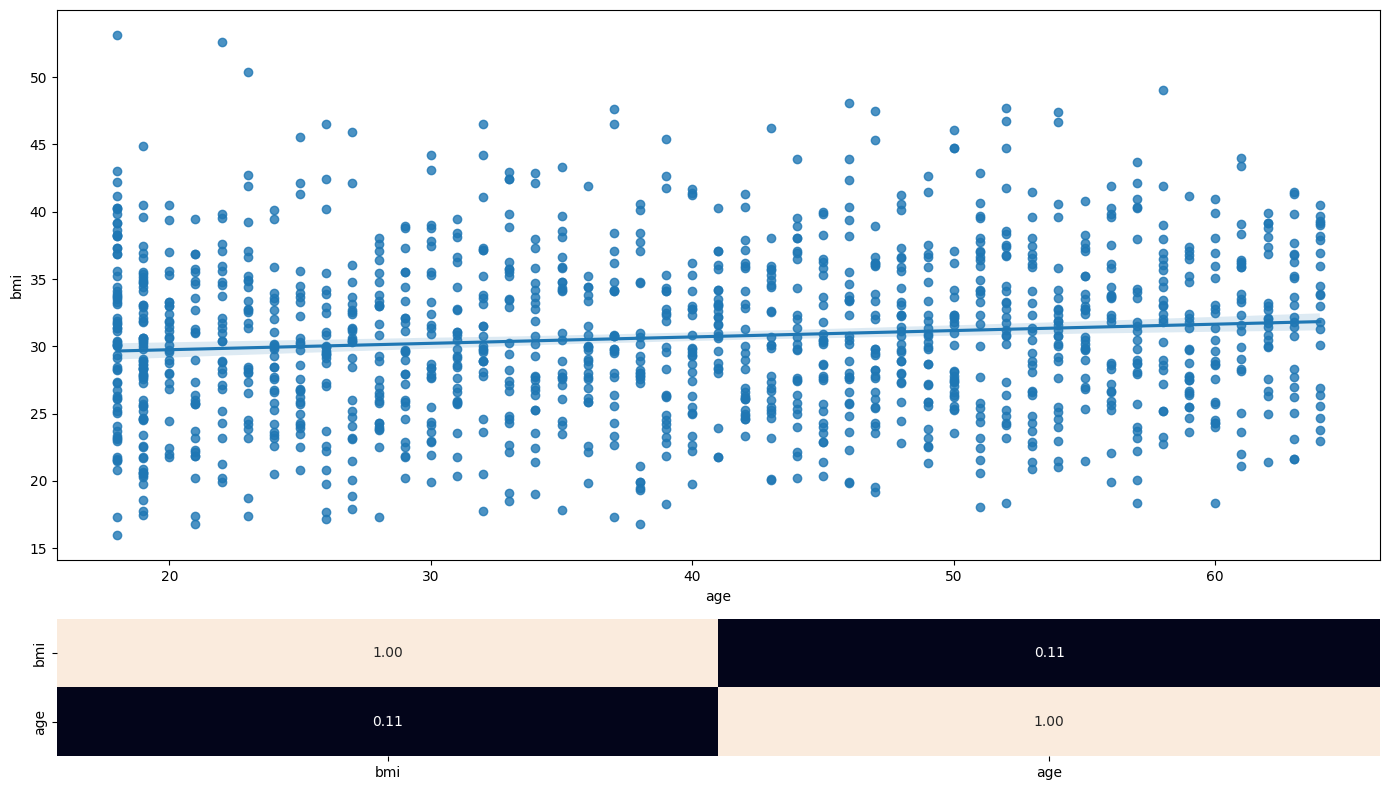

In [26]:
fig, axis = plt.subplots(2, 1, figsize = (14, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_dataf, x = "age", y = "bmi")
sns.heatmap(total_dataf[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones post-mapa de calor

Una vez realizado el mapa de calor, se comprobó una relación de 

### Análisis categórico-categórico

No se puede realizar un primer análisis con la variable objetivo ya que no sería lógico factorizar "Charges". Por lo tanto, seguiremos con el análisis.

### Combinaciones de la clase con varias predictoras

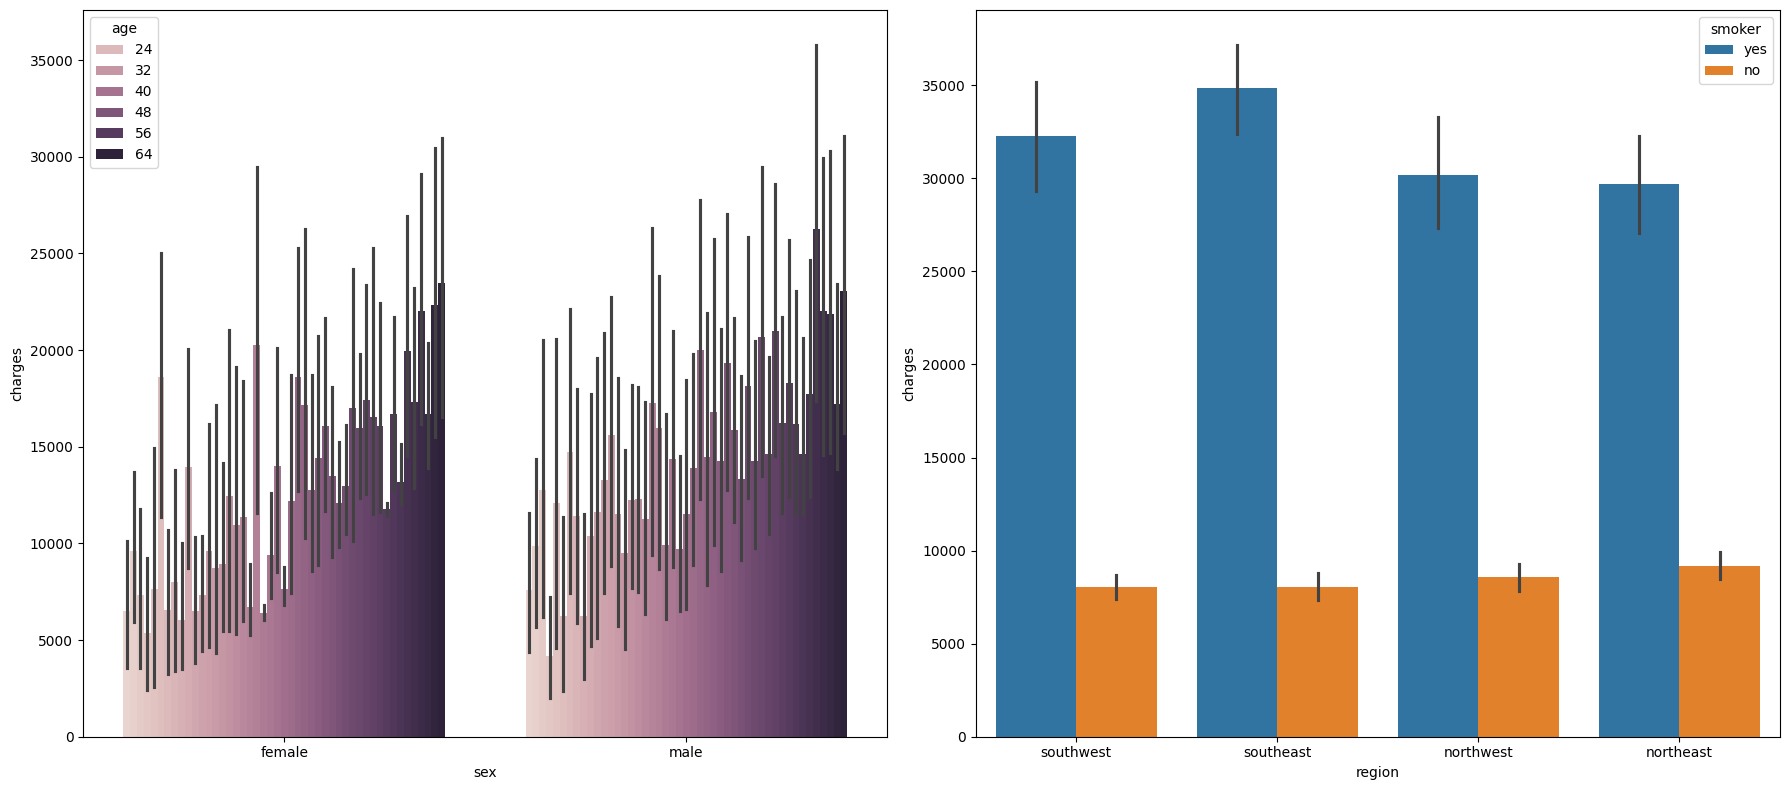

In [27]:
fig, axis = plt.subplots(1, 2, figsize = (18, 8))

sns.barplot(ax = axis[0], data = total_dataf, x = "sex", y = "charges", hue = "age")
sns.barplot(ax = axis[1], data = total_dataf, x = "region", y = "charges", hue = "smoker")

plt.tight_layout()

plt.show()

## Análisis de correlaciones (completo)

### Factorizar las variables categóricas

In [28]:

lista_a_factorizar = ["sex", "smoker", "region"]

for var in lista_a_factorizar:
  url_transformado = "../data/processed/" + var + "_transformation_rules.json"
  var_n = var+"_n"

  total_dataf[var_n] = pd.factorize(total_dataf[var])[0]
  total_dataf[[var_n, var]]

  transformation_rules = {row[var]: row[var_n] for index, row in total_dataf[[var_n, var]].drop_duplicates().iterrows()}

  with open(url_transformado, "w") as f:
    json.dump(transformation_rules, f)

#### Mapa de calor

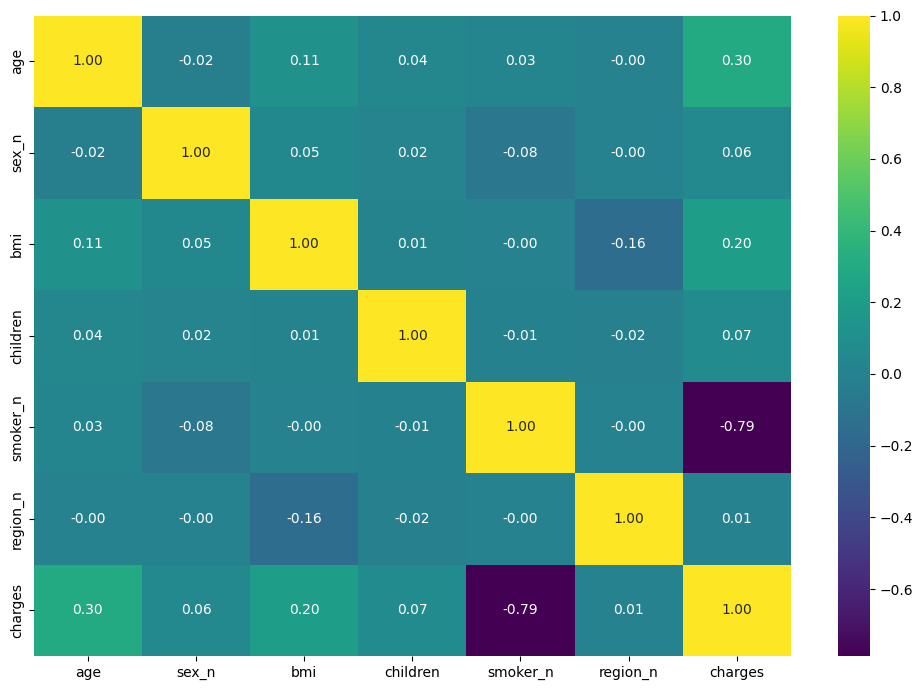

In [29]:
cols_num = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_dataf[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show() 
   


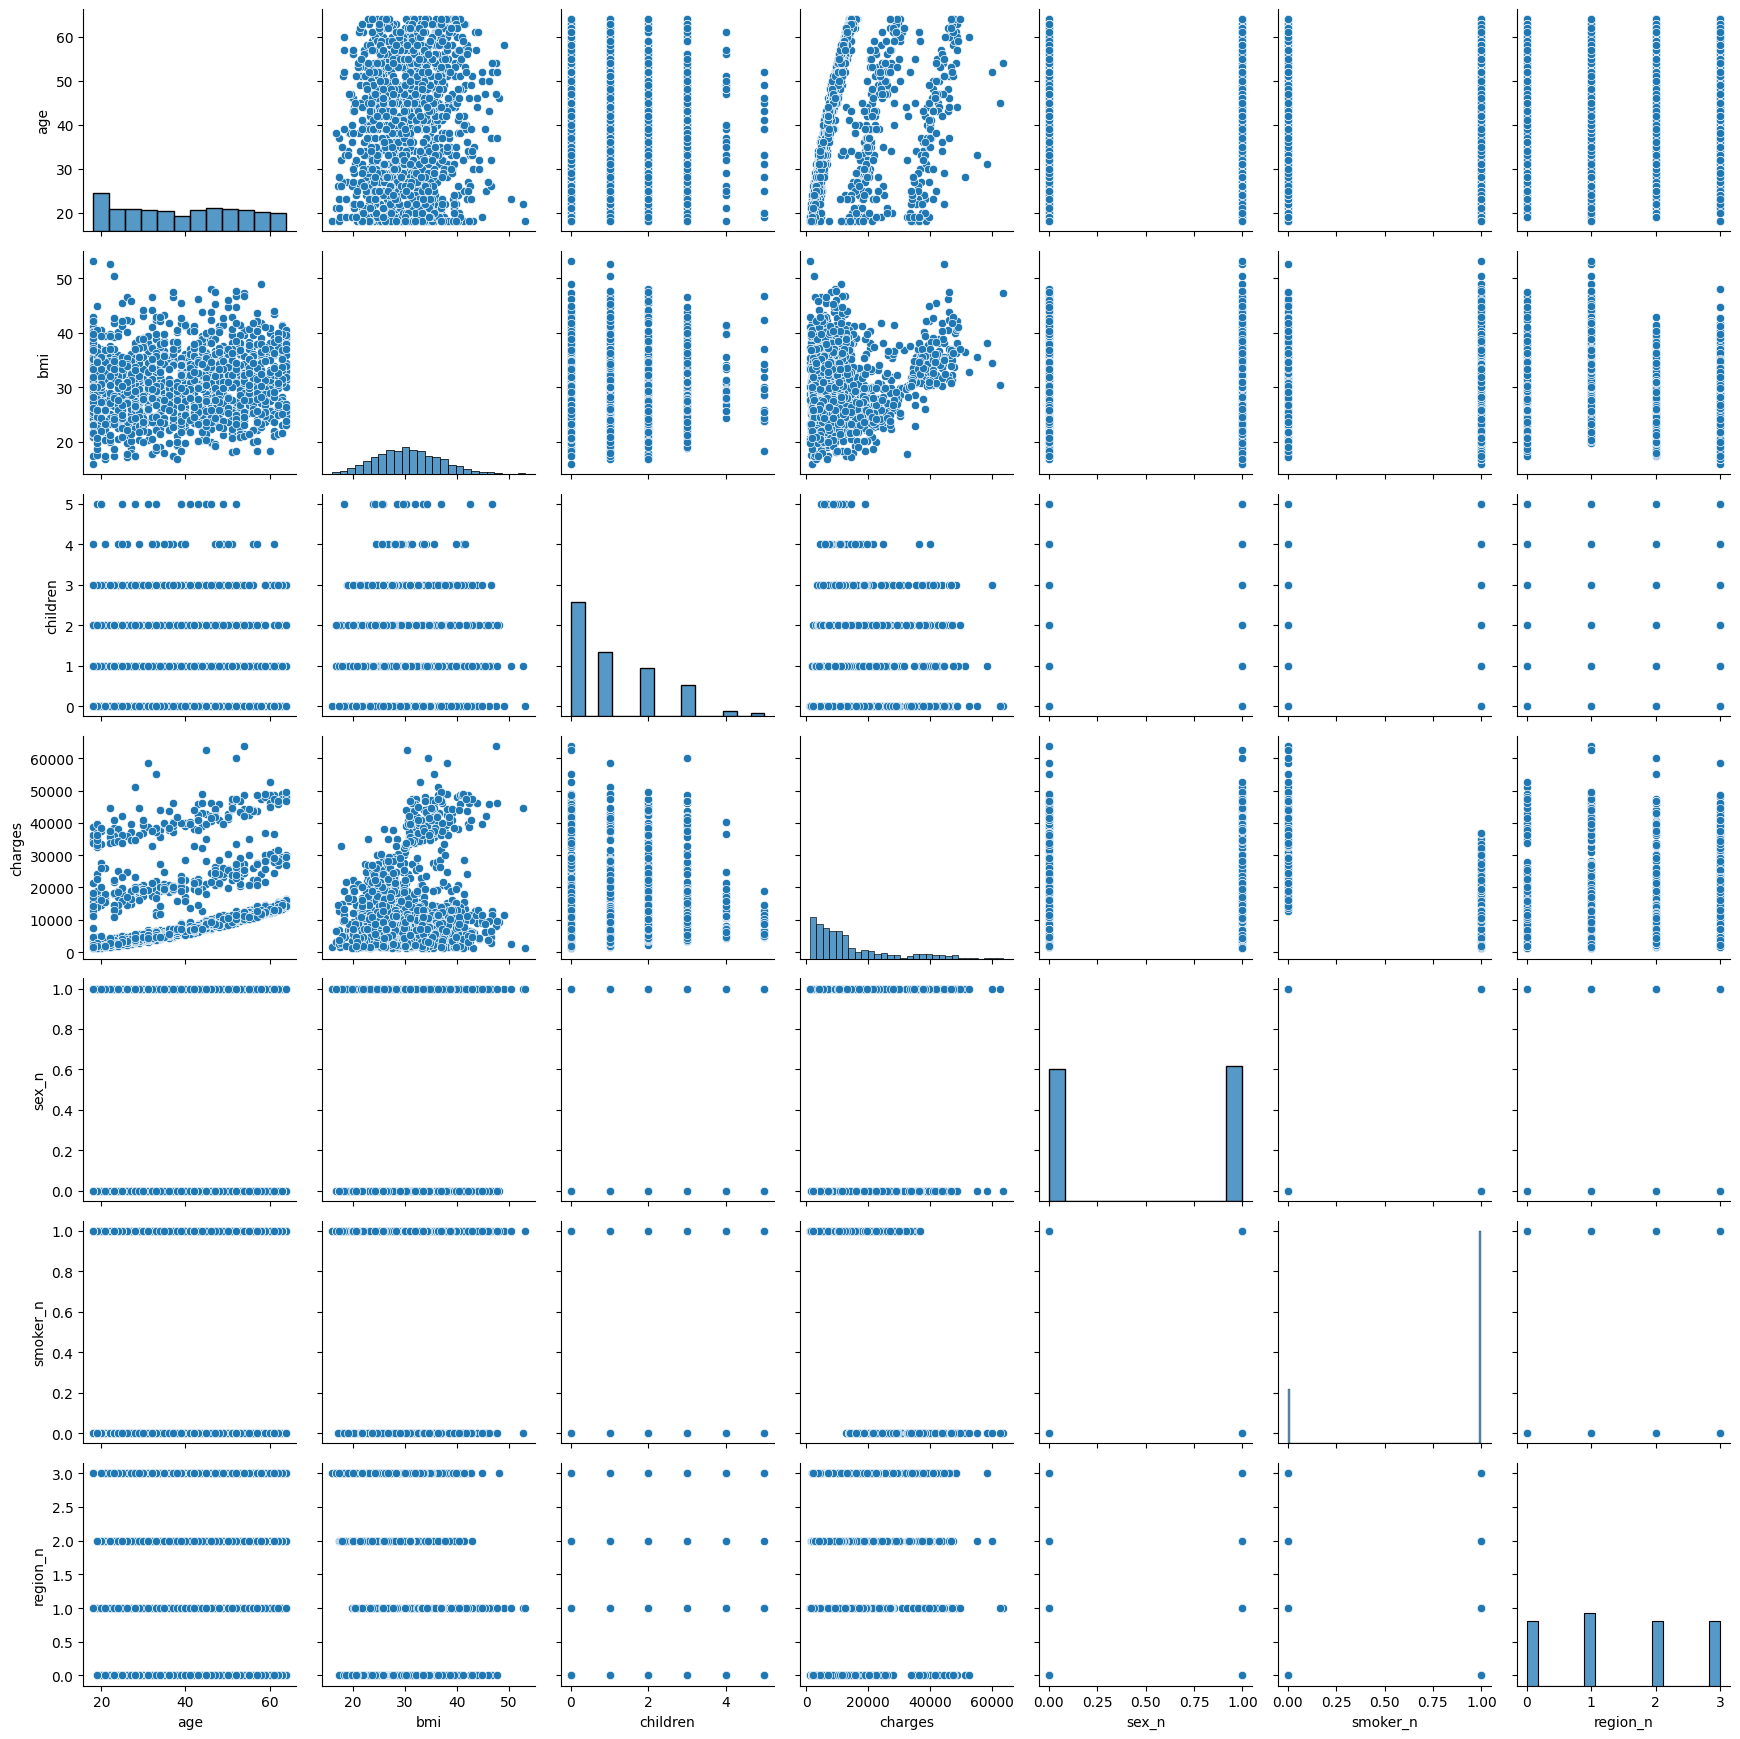

In [30]:
sns.pairplot(data = total_dataf)
plt.tight_layout()
plt.show()

## Feature engineering

### Análisis de outliers

In [31]:
FINAL_COLS = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]
total_dataf = total_dataf[FINAL_COLS]
total_dataf.describe()

,age,sex_n,bmi,children,smoker_n,region_n,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Podemos decir que el único campo que tiene sentido modificar los outliers es "bmi".

In [32]:

# Guardamos todos los datasets:

total_data_CON_outliers = total_dataf.copy()
total_data_SIN_outliers = total_dataf.copy()

outliers_cols = ["bmi"]

def replace_outliers(column, df):
  col_stats = total_dataf[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

with open("../data/processed/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

### Análisis de valores faltantes

In [33]:
print(total_data_CON_outliers.isnull().sum().sort_values(ascending=False))
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex_n       0
bmi         0
children    0
smoker_n    0
region_n    0
charges     0
dtype: int64


age         0
sex_n       0
bmi         0
children    0
smoker_n    0
region_n    0
charges     0
dtype: int64

No hay rastro de nulos en nuestros dataframes.

### Inferencia de nuevas características

En este análisis se llegó a la conclusión que no hay una nueva característica posible para crear.

### Escalado de valores

In [34]:
predictoras = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n"]
target = "charges"

X_CON = total_data_CON_outliers.drop(target, axis = 1)[predictoras]
X_SIN = total_data_SIN_outliers.drop(target, axis = 1)[predictoras]
y = total_data_CON_outliers[target]

X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 10)
X_train_SIN_outliers, X_test_SIN_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 10)

In [35]:
# Normalización

norm_CON_outliers = StandardScaler()

norm_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_norm = norm_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_norm = pd.DataFrame(X_train_CON_outliers_norm, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_norm = norm_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_norm = pd.DataFrame(X_test_CON_outliers_norm, index = X_test_CON_outliers.index, columns = predictoras)

# SIN OUTLIERS
norm_SIN_outliers = StandardScaler()
norm_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_norm = norm_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_norm = pd.DataFrame(X_train_SIN_outliers_norm, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_norm = norm_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_norm = pd.DataFrame(X_test_SIN_outliers_norm, index = X_test_SIN_outliers.index, columns = predictoras)


# ESCALADO MIN-MAX (MINMAXIMIZACIÓN)

scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = scaler_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_scal = pd.DataFrame(X_train_CON_outliers_scal, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_scal = scaler_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_scal = pd.DataFrame(X_test_CON_outliers_scal, index = X_test_CON_outliers.index, columns = predictoras)

# SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = scaler_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_scal = pd.DataFrame(X_train_SIN_outliers_scal, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_scal = scaler_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_scal = pd.DataFrame(X_test_SIN_outliers_scal, index = X_test_SIN_outliers.index, columns = predictoras)


# Guardado de los datasets resultantes
X_train_CON_outliers.to_excel("../data/processed/X_train_CON_outliers.xlsx", index = False)
X_train_CON_outliers_norm.to_excel("../data/processed/X_train_CON_outliers_norm.xlsx", index = False)
X_train_CON_outliers_scal.to_excel("../data/processed/X_train_CON_outliers_scal.xlsx", index = False)
X_train_SIN_outliers.to_excel("../data/processed/X_train_SIN_outliers.xlsx", index = False)
X_train_SIN_outliers_norm.to_excel("../data/processed/X_train_SIN_outliers_norm.xlsx", index = False)
X_train_SIN_outliers_scal.to_excel("../data/processed/X_train_SIN_outliers_scal.xlsx", index = False)

X_test_CON_outliers.to_excel("../data/processed/X_test_CON_outliers.xlsx", index = False)
X_test_CON_outliers_norm.to_excel("../data/processed/X_test_CON_outliers_norm.xlsx", index = False)
X_test_CON_outliers_scal.to_excel("../data/processed/X_test_CON_outliers_scal.xlsx", index = False)
X_test_SIN_outliers.to_excel("../data/processed/X_test_SIN_outliers.xlsx", index = False)
X_test_SIN_outliers_norm.to_excel("../data/processed/X_test_SIN_outliers_norm.xlsx", index = False)
X_test_SIN_outliers_scal.to_excel("../data/processed/X_test_SIN_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

# SCALERS

with open("../models/norm_CON_outliers.pkl", "wb") as file:
  pickle.dump(norm_CON_outliers, file)
with open("../models/norm_SIN_outliers.pkl", "wb") as file:
  pickle.dump(norm_SIN_outliers, file)
with open("../models/scaler_CON_outliers.pkl", "wb") as file:
  pickle.dump(scaler_CON_outliers, file)
with open("../models/scaler_SIN_outliers.pkl", "wb") as file:
  pickle.dump(scaler_SIN_outliers, file)

## Feature Selection

In [36]:
X_train = X_train_CON_outliers.copy()
X_test = X_test_CON_outliers.copy()

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,sex_n,bmi,children,smoker_n,region_n
0,1.0,35.530,0.0,1.0,2.0
1,1.0,27.455,1.0,1.0,3.0
2,0.0,30.115,0.0,1.0,3.0
3,1.0,34.100,0.0,1.0,1.0
4,1.0,29.480,0.0,1.0,1.0
